# ECE326 Final Project

**Topic:** Datascience using Python  
**Study:** https://www.tensorflow.org/tutorials  
**Study:** https://scikit-learn.org/stable/tutorial/index.html
  
**Provide a brief description of TensorFlow. Compare pros and cons with the Scikit package.**  
TensorFlow is open-source software that is used for machine learning/artificial intelligence. TensorFlow allows people to prepare and load large datasets, as well as build, tune, and deploy models. Some of the pros of TensorFlow over the Scikit package are that TensorFlow allows you to track your models’ training progress, it is built to run parallel, and it can perform calculations quickly. A con is that TensorFlow requires knowledge of mathematics and machine learning, making it less beginner friendly than the Scikit package which provides simple abstractions. Another con is that it can be tough to debug and find errors in TensorFlow.

**Choose a dataset, provide a reason why you chose that dataset.**  
The dataset that I chose is called efron_morris75. The TensorFlow website states that this data represents “The batting averages of 18 Major League Baseball players through their first 45 at-bats of the 1970 season, along with their batting average for the remainder of the season”. I chose this dataset because there are various parameters (e.g., batting average, hits, remaining average, season average, season hits) that make interesting graphs. I was also interested to see if I could spot patterns/relationships between various parameters (e.g., between batting average, remaining average, and season average).  

**What anomalies did you filter out, and why?**  
There were no anomalies in the dataset. There were 18 entries and all contained valid data (i.e., nothing missing/nothing deviated from the norm).

**Do you think TensorFlow can be used to implement a spell-checker? Explain.**  
A spell-checker can be implemented without machine learning or TensorFlow. TensorFlow can be used to implement a spell-checker, although it is not necessary. Similarly as done in lab 3, a spell-checker can be implemented with TensorFlow by loading the data and checking if a word is found in the data of correctly spelled words. TensorFlow can further enhance the spell-checker. It can use machine learning to learn common misspellings of words to perform autocorrect. It can also use machine learning to perform grammar-checking in addition to spell-checking.


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


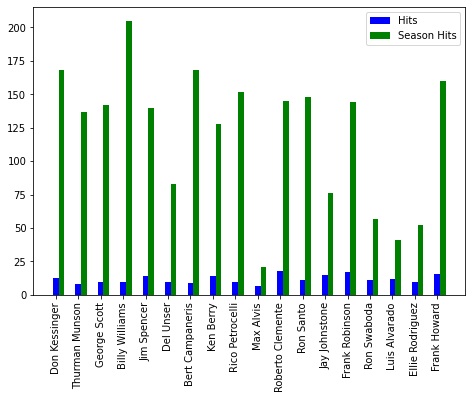

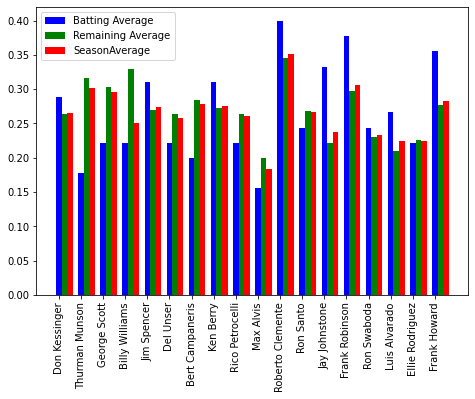

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds # Accessing dataset.
import matplotlib.pyplot as plt # Plotting and drawing histogram.
import csv # Printing to CSV.
from google.colab import drive # Accessing Drive API and authenticating personal Drive.
import numpy as np

# Load the dataset.
ds = tfds.load('efron_morris75', split='train')
assert isinstance(ds, tf.data.Dataset)

# Mount Drive to Colab.
drive.mount('/gdrive')

# Define the headers of the columns in the CSV file.
header = ['At-Bats', 'BattingAverage', 'FirstName', 'Hits', 'LastName', 'RemainingAt-Bats', 'RemainingAverage', 'SeasonAt-Bats', 'SeasonAverage', 'SeasonHits']

all_data = [] # To hold data for each row of the CSV file.
avg_data = [[], [], []] # To hold averages data from the dataset that will be displayed.
hits_data = [[], []] # To hold hits data from the dataset that will be displayed.
names_data = [] # To hold names data from the dataset that will be displayed.

for d in ds:
  # Populate all_data.
  atBats = d['At-Bats'].numpy()
  battingAverage = d['BattingAverage'].numpy()
  firstName = d['FirstName'].numpy().decode('utf-8')
  hits = d['Hits'].numpy()
  lastName = d['LastName'].numpy().decode('utf-8')
  remainingAtBats = d['RemainingAt-Bats'].numpy()
  remainingAverage = d['RemainingAverage'].numpy()
  seasonAtBats = d['SeasonAt-Bats'].numpy()
  seasonAverage = d['SeasonAverage'].numpy()
  seasonHits = d['SeasonHits'].numpy()
  all_data.append([atBats, battingAverage, firstName, hits, lastName, remainingAtBats, remainingAverage, seasonAtBats, seasonAverage, seasonHits])

  # Populate avg_data.
  avg_data[0].append(battingAverage)
  avg_data[1].append(remainingAverage)
  avg_data[2].append(seasonAverage)

  # Populate hits_data.
  hits_data[0].append(hits)
  hits_data[1].append(seasonHits)

  # Populate names_data.
  names_data.append(firstName + " " + lastName)

# Export (write) the filtered data in CSV format.
# Reference: https://www.pythontutorial.net/python-basics/python-write-csv-file/
with open('/gdrive/My Drive/Colab Notebooks/test.csv', 'w') as f:
  writer = csv.writer(f)

  # Write the header.
  writer.writerow(header)

  for data in all_data:
    # Write the data.
    writer.writerow(data)

# Fetch and display various parameters of the dataset.
X = np.arange(18)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, hits_data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, hits_data[1], color = 'g', width = 0.25)
ax.set_xticks(range(len(names_data)))
ax.set_xticklabels(names_data, rotation='vertical')
ax.legend(labels=['Hits', 'Season Hits'])
plt.show()

# Draw histogram for important parameters.
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.bar(X + 0.00, avg_data[0], color = 'b', width = 0.25)
ax1.bar(X + 0.25, avg_data[1], color = 'g', width = 0.25)
ax1.bar(X + 0.50, avg_data[2], color = 'r', width = 0.25)
ax1.set_xticks(range(len(names_data)))
ax1.set_xticklabels(names_data, rotation='vertical')
ax1.legend(labels=['Batting Average', 'Remaining Average', 'SeasonAverage'])
plt.show()
